# Desafio 2

In [ ]:
#### Aleks Goncasz: RM 338967
#### Joana Durvalo: RM 336769
#### Jonathan Murakami: RM 338845
#### Priscila Diz: RM 338674

### Obtendo informações importantes acerca do dataset

Vamos utilizar o dataset breast_cancer_data.csv para fazer uma análise exploratória cujo objetivo é responder a alguns questionamentos que surgiram a respeito desse conjunto.

Vamos começar lendo e entendendo nossos dados:

In [2]:
import pandas as pd
import numpy as np

In [3]:
colunas = ['id','clump_thickness','cell_size_uniformity','cell_shape_uniformity','marginal_adhesion','single_ep_cell_size',
          'bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','cancer_class','doctor_name']

data = pd.read_csv('breast_cancer_data.csv',names=colunas)
data.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,cancer_class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong


In [4]:
# TODO: entendimento básico dos dados - preencha as lacunas no código a fim de obter o resultado desejado

# quantas linhas e quantas colunas existem no dataset?
contar_coluna = data.shape
print('Formato:', '\n', 'Qtde linhas: ', contar_coluna[0], '\n','Qtde colunas:', contar_coluna[1], '\n')

#quais os tipos de dados de cada coluna?

tipo_dados = data.dtypes

print('Tipos de dados: ','\n', tipo_dados,'\n')

#quais as principais estatísticas dos dados numéricos do dataset?

estatisticas = data.describe()

print('Principais estatísticas: ', '\n', estatisticas, '\n')

Formato: 
 Qtde linhas:  699 
 Qtde colunas: 12 

Tipos de dados:  
 id                         int64
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
cancer_class              object
doctor_name               object
dtype: object 

Principais estatísticas:  
                  id  clump_thickness  cell_size_uniformity  \
count  6.990000e+02       698.000000            698.000000   
mean   1.071704e+06         4.416905              3.137536   
std    6.170957e+05         2.817673              3.052575   
min    6.163400e+04         1.000000              1.000000   
25%    8.706885e+05         2.000000              1.000000   
50%    1.171710e+06         4.000000              1.000000   
75%    1.238298e+06         6.000000              5.00000

In [3]:
# TODO: obtendo informações sobre o dataset

# retorne uma Serie que mostre qual a classificação (maligno e benigno) que cada médico deu para cada amostra: 
# Exemplo de retorno
# class      doctor_name
# benign   Dr. Doe        127
#          Dr. Lee        121
#          Dr. Smith      102
#          Dr. Wong       108

# Código: 

series = data.groupby(["cancer_class","doctor_name"])["id"].count().sort_values(ascending=False)
print(series)

cancer_class  doctor_name
benign        Dr. Doe        127
              Dr. Lee        121
              Dr. Wong       108
              Dr. Smith      102
malignant     Dr. Smith       74
              Dr. Lee         60
              Dr. Doe         58
              Dr. Wong        49
Name: id, dtype: int64


In [4]:
# TODO: obtendo informações sobre o dataset

# Use o método select_dtypes() para selecionar apenas colunas do tipo float64 e int64. Armazene na variável data_num
data_num = data.select_dtypes(include=["float","int64"])

# Encontre as n variáveis que possuem um valor absoluto de correlação maior que 0.5 com a variável clump_thickness, excluindo ela mesma 
# retorne os valores de forma descendente
# sempre utilize a variável data_num para receber o resultado de suas operações

corr_aux1 = data.corr()
corr_aux2=corr_aux1['clump_thickness'].sort_values(ascending=False)
data_num= corr_aux2[(corr_aux2 > 0.5) & (corr_aux2 != 1)]

print("Existem {} variáveis correlacionadas com clump_thickness: \n{}".format(len(data_num), data_num))

Existem 5 variáveis correlacionadas com clump_thickness: 
cell_shape_uniformity    0.654632
cell_size_uniformity     0.644636
bland_chromatin          0.558924
normal_nucleoli          0.535773
single_ep_cell_size      0.522108
Name: clump_thickness, dtype: float64


In [5]:
# TODO: obtendo informações sobre o dataset

# qual o tamanho médio das células para cada tipo de tumor?
tipo_beligno = data.query("cancer_class == 'benign'")
tipo_maligno = data.query("cancer_class == 'malignant'")
celula_beligna = tipo_beligno['cell_size_uniformity'].mean()
celula_maligna = tipo_maligno['cell_size_uniformity'].mean()

print('Tamanho médio do tipo benigno: ',celula_beligna,'\n')
print('Tamanho médio do tipo maligno: ',celula_maligna,'\n')

# qual o número máximo de mitoses em tumores benignos encontrados pelo Dr. Wong?
dr_beligno = data.query("doctor_name == 'Dr. Wong' & cancer_class == 'benign'")
total_mitoses_malignas = dr_beligno['mitoses'].max()

print('Número máximo de mitoses em tumores benignos: ', total_mitoses_malignas)

# e qual o número máximo de mitoses em tumores malignos encontrados pelo mesmo médico?
dr_maligno = data.query("doctor_name == 'Dr. Wong' & cancer_class == 'malignant'")
total_mitoses_malignas = dr_maligno['mitoses'].max()

print('\n Número máximo de mitoses em tumores malignos: ',total_mitoses_malignas)

Tamanho médio do tipo benigno:  1.3260393873085339 

Tamanho médio do tipo maligno:  6.572614107883817 

Número máximo de mitoses em tumores benignos:  3

 Número máximo de mitoses em tumores malignos:  10


In [6]:
# TODO: filtrando os dados

# Existem três pacientes (id) que aparecem mais que duas vezes no dataset. Retorne uma série ordenada de forma descendente que mostre o
# id do paciente bem como a quantidade de vezes que ele aparece repetido no dataset

paciente_repetido = data.groupby(['id'])['id'].count().sort_values(ascending=False)
print(paciente_repetido)

# Elimine esses três pacientes do dataframe de modo que este contenha apenas pacientes que apareceram no máximo duas vezes
filtrar_pacientes = data.query("id != '1182404' & id != '1276091' & id != '1198641'")

filtro = filtrar_pacientes.groupby(['id'])['id'].count().sort_values(ascending=False)
print(filtro)

id
1182404    6
1276091    5
1198641    3
1238777    2
385103     2
          ..
1212232    1
1211594    1
1211265    1
1211202    1
61634      1
Name: id, Length: 645, dtype: int64
id
1105524    2
385103     2
1143978    2
822829     2
1240603    2
          ..
1212232    1
1211594    1
1211265    1
1211202    1
61634      1
Name: id, Length: 642, dtype: int64


## Treinando visualização de dados

Anteriormente, utilizamos o dataset Lemonades.csv para realizar análise exploratória de dados. Vamos refazer aqui o que já havíamos implementado e, em cima do resultado, vamos continuar nossa análise, mas dessa vez utilizando gráficos. 

In [7]:
# Não modifique nada abaixo
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


lemonades = pd.read_csv('Lemonades.csv', sep = ';')
lemonades['Leaflets'].fillna((lemonades['Leaflets'].median()), inplace=True)
lemonades['Date'] = pd.to_datetime(lemonades['Date'], format="%m/%d/%Y")     
tmp = lemonades['Date'].apply(lambda t: (t-datetime(1970,1,1)).total_seconds())
tmp.interpolate(inplace=True)    
lemonades['Date'] = pd.to_datetime(tmp, unit='s') 
lemonades['Date'] = lemonades['Date'].apply(lambda t: t.date())
lemonades = lemonades.drop_duplicates()
lemonades["Sales"] = lemonades["Lemon"] + lemonades["Orange"]
lemonades["Revenue"] = lemonades["Sales"] * lemonades["Price"]

### Orientações

> Defina o tamanho do gráfico como 15 por 5. Para isso, faça: plt.figure(figsize = (15,5))

> Adicione título do gráfico, rótulo do eixo x e rótulo do eixo y

> Descreva sua interpretação do gráfico

## Imprima um gráfico de linha que apresente o lucro (Revenue) ao longo do tempo

Text(0, 0.5, 'Lucro')

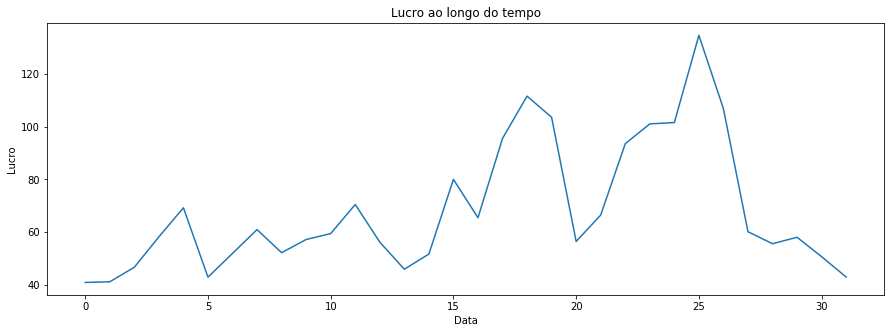

In [8]:
# Resposta
fig, axes = plt.subplots(figsize = (15,5))
revenue_graph = plt.plot(lemonades['Revenue'])
plt.title('Lucro ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Lucro')

#### Interpretação:
Nesse dataset é possível verificar que o maior lucro foi no dia 25 com aproximadamente $120. Os perídos com menor volume são ente os dias 5 e 12.

## Crie um scatter-plot de leaflets (eixo x) por sales (eixo y)

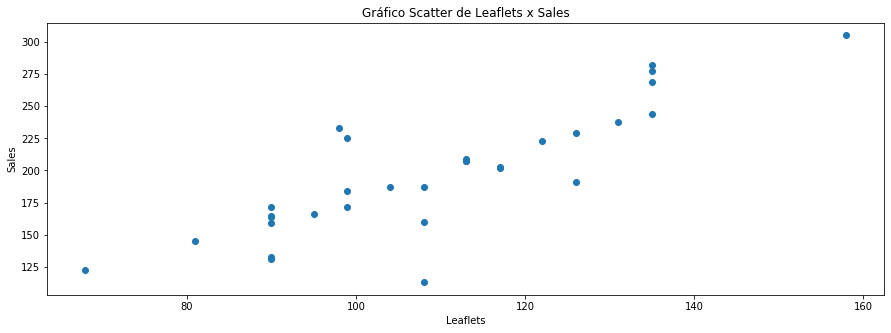

In [9]:
# Resposta
fig, axes = plt.subplots(figsize = (15,5))

plt.scatter(lemonades['Leaflets'],lemonades['Sales'])
plt.title('Gráfico Scatter de Leaflets x Sales')
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.show()

#### Interpretação: 
No gráfico acima é possível verificar que quanto maior a quantidade de folhetos que são enviados/disparados, maior é a quantidade de vendas. Entende-se que essa é uma boa forma de divulgação e conversão de clientes.

### Crie um histograma de temperatura com 10 bins

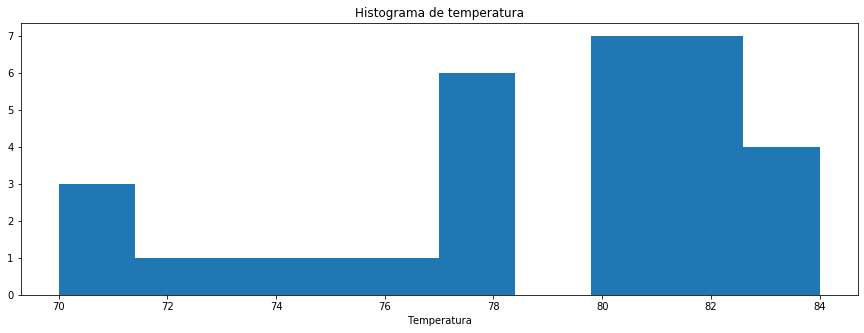

In [10]:
# Resposta
fig, axes = plt.subplots(figsize = (15,5))
histoRevenue_graph = plt.hist(lemonades['Temperature'], bins = 10)
plt.xlabel('Temperatura')
plt.title('Histograma de temperatura');


#### Interpretação: 
No histograma de temperatura é possível identificar que temos maior concentração de frutas entre 80-82 de temperatura.
Nenhuma entre 78-80 o que gera um grande desvio na visualização.

###  Crie um gráfico de linha que mostre o lucro por tipo de fruta ao longo do tempo.

Observação: adicione legenda nesse gráfico

Text(0, 0.5, 'Lucro')

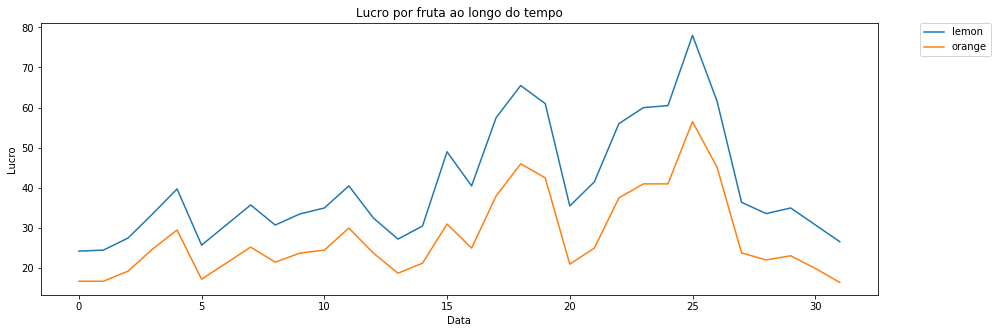

In [11]:
# Resposta
lemonades['Revenue.Lemon'] = lemonades['Lemon'] * lemonades['Price']
lemonades['Revenue.Orange'] = lemonades['Orange'] * lemonades['Price']

fig, axes = plt.subplots(figsize = (15,5))
revenue_graph = plt.plot(lemonades['Revenue.Lemon'], label = "lemon")
revenue_graph = plt.plot(lemonades['Revenue.Orange'], label = "orange")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Lucro por fruta ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Lucro')

#### Interpretação:
O Lucro do Lemon é bem maior do que a Laranja e os dois possuem comportamentos semelhantes quanto ao período de pico de vendas (Dia 18 e 25).